# Plot STM Param Results

<p>This notebook plots the spectral parameters from SpectralTimeModel analysis

<p>created: March 18, 2024
<p>last modified:  April 1, 2024

### Imports

In [33]:
# general
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import zscore

# custom
import sys
sys.path.append("../../code")
from info import SESSIONS, N_ARRAYS, N_CHANS, IDX_ZERO
from paths import PROJECT_PATH

# settings
plt.style.use('../../mpl_styles/default.mplstyle')

### Main

In [34]:
# load data
data = pd.read_csv(fr"{PROJECT_PATH}\data\results\lfp_stm_params.csv")
data

,Unnamed: 0,session,channel,chan_idx,array,event,window,offset,knee,exponent,...,alpha_pw,alpha_bw,beta_cf,beta_pw,beta_bw,gamma_cf,gamma_pw,gamma_bw,error,r_squared
0,0,A_SNR_041018,0,0,1,0,0,6.795210,-1.846419,2.337249,...,NaN,NaN,20.890956,0.224983,11.992839,84.198499,0.132514,12.000000,0.032021,0.997366
1,1,A_SNR_041018,0,0,1,0,1,6.737711,-4.511377,2.295678,...,NaN,NaN,20.902825,0.226633,12.000000,61.621175,0.182840,3.827135,0.039661,0.995919
2,2,A_SNR_041018,0,0,1,0,2,6.755493,-4.149983,2.305570,...,NaN,NaN,20.926484,0.222615,12.000000,61.539609,0.193738,3.815145,0.041530,0.995477
3,3,A_SNR_041018,0,0,1,0,3,6.780586,-3.431958,2.320047,...,NaN,NaN,20.866057,0.221432,11.833854,61.507654,0.193887,3.920132,0.040069,0.995806
4,4,A_SNR_041018,0,0,1,0,4,6.825531,-1.580806,2.347456,...,NaN,NaN,20.796904,0.222093,11.686082,61.560461,0.184212,4.285739,0.035822,0.996423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535995,511995,L_SNR_250717,63,1023,16,1023,495,6.992720,-1.496442,2.293409,...,NaN,NaN,20.553714,0.316953,8.651914,62.071582,0.364958,7.753122,0.095770,0.975272
1535996,511996,L_SNR_250717,63,1023,16,1023,496,6.971888,-1.889051,2.283320,...,NaN,NaN,20.532249,0.318419,8.686486,61.977642,0.361673,7.517469,0.094312,0.975615
1535997,511997,L_SNR_250717,63,1023,16,1023,497,6.994990,-0.191089,2.298115,...,NaN,NaN,20.600150,0.298774,8.555499,62.022368,0.360953,7.569785,0.094283,0.975664
1535998,511998,L_SNR_250717,63,1023,16,1023,498,6.949316,-1.983348,2.277146,...,NaN,NaN,20.508147,0.316415,8.653674,61.919241,0.364432,7.401750,0.093088,0.976546


In [19]:
# get df for one session
session_df = data[data.get('session') == 'A_SNR_041018']

count = 0
z_offs = np.array([])
z_exps = np.array([])

for i in range(N_CHANS * N_ARRAYS):
    # channel zscore values
    data_a = session_df.iloc[np.arange(count, count + 500)]

    z_off = zscore(data_a['offset'], nan_policy='omit')
    z_offs = np.append(z_offs, z_off)

    z_exp = zscore(data_a['exponent'], nan_policy='omit')
    z_exps = np.append(z_exps, z_exp)

    count = count + 500

data_az = session_df.assign(z_offset = z_offs).assign(z_exponent = z_exps)
data_az

,Unnamed: 0,session,channel,chan_idx,array,event,window,offset,knee,exponent,...,beta_cf,beta_pw,beta_bw,gamma_cf,gamma_pw,gamma_bw,error,r_squared,z_offset,z_exponent
0,0,A_SNR_041018,0,0,1,0,0,6.795210,-1.846419,2.337249,...,20.890956,0.224983,11.992839,84.198499,0.132514,12.000000,0.032021,0.997366,-1.474499,-1.472312
1,1,A_SNR_041018,0,0,1,0,1,6.737711,-4.511377,2.295678,...,20.902825,0.226633,12.000000,61.621175,0.182840,3.827135,0.039661,0.995919,-1.534714,-1.545172
2,2,A_SNR_041018,0,0,1,0,2,6.755493,-4.149983,2.305570,...,20.926484,0.222615,12.000000,61.539609,0.193738,3.815145,0.041530,0.995477,-1.516091,-1.527835
3,3,A_SNR_041018,0,0,1,0,3,6.780586,-3.431958,2.320047,...,20.866057,0.221432,11.833854,61.507654,0.193887,3.920132,0.040069,0.995806,-1.489813,-1.502461
4,4,A_SNR_041018,0,0,1,0,4,6.825531,-1.580806,2.347456,...,20.796904,0.222093,11.686082,61.560461,0.184212,4.285739,0.035822,0.996423,-1.442746,-1.454423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511995,511995,A_SNR_041018,63,1023,16,1023,495,6.792958,658.437774,2.420207,...,18.769089,0.361873,4.269659,60.366291,0.994740,8.035719,0.074240,0.972098,-1.677893,-1.460451
511996,511996,A_SNR_041018,63,1023,16,1023,496,6.789345,662.301046,2.421137,...,18.761752,0.360628,4.265018,60.341614,0.996144,8.001164,0.073588,0.972056,-1.685219,-1.457033
511997,511997,A_SNR_041018,63,1023,16,1023,497,6.773557,645.563718,2.414653,...,18.751305,0.360307,4.278794,60.308856,0.997339,7.941829,0.072254,0.972638,-1.717229,-1.480856
511998,511998,A_SNR_041018,63,1023,16,1023,498,6.753693,622.822668,2.405711,...,18.745371,0.360373,4.295762,60.269434,1.000853,7.856994,0.071024,0.973450,-1.757502,-1.513706


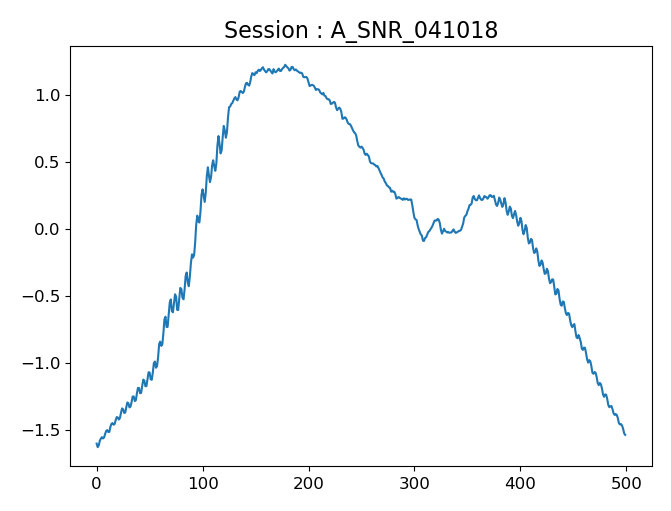

In [29]:
data_az = data_az.groupby('window').mean().reset_index()

# ci_offset = st.norm.interval(alpha=0.95, loc=np.mean(data_az.get('z_offset')), scale=st.sem(data_az.get('z_offset')))
# ci_offset

fig, ax = plt.subplots()
ax.plot(data_az.get('window'), data_az.get('z_offset'))
ax.set_title('Session : A_SNR_041018')
plt.show()
# ax.fill_between(avg_a18.get('window'), (avg_a18.get('z_offset') - ci), (avg_a18.get('z_offset') + ci), color='b', alpha=.1)

### All sessions

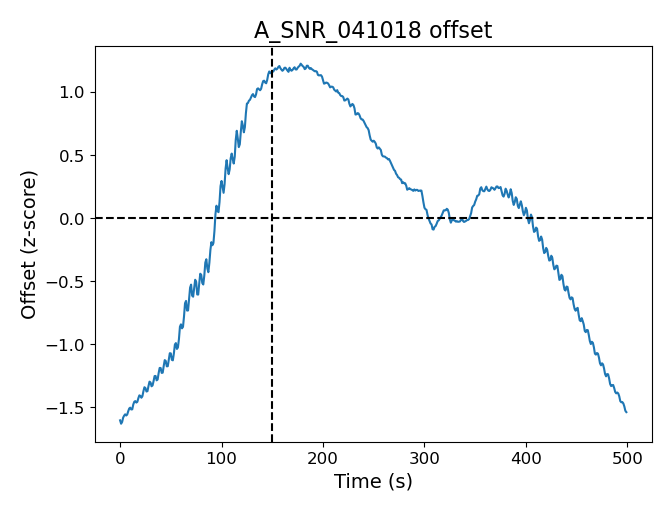

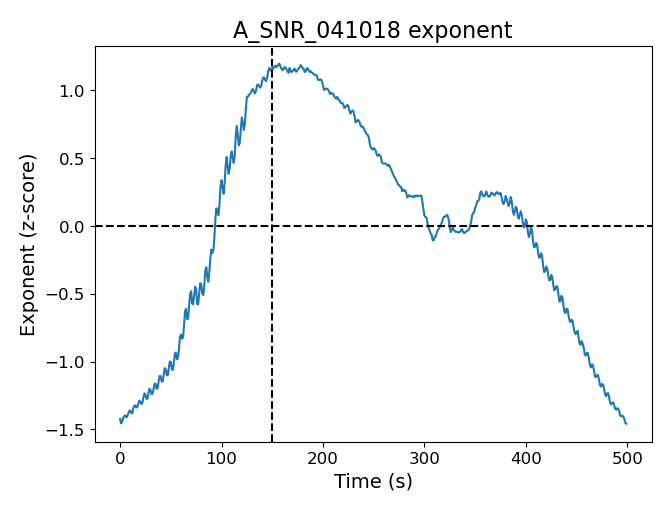

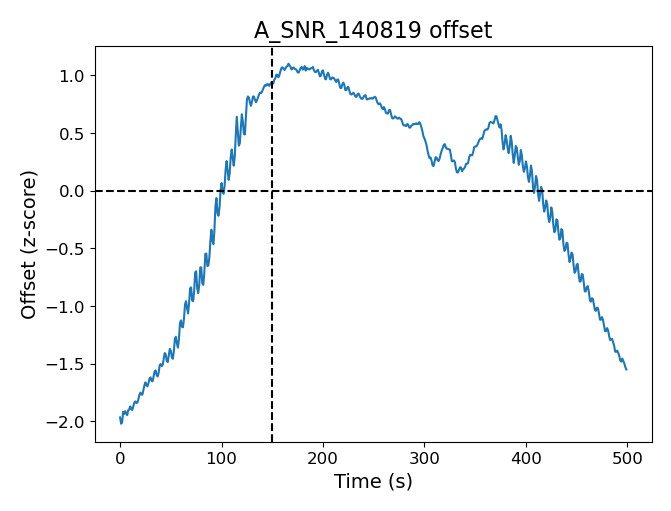

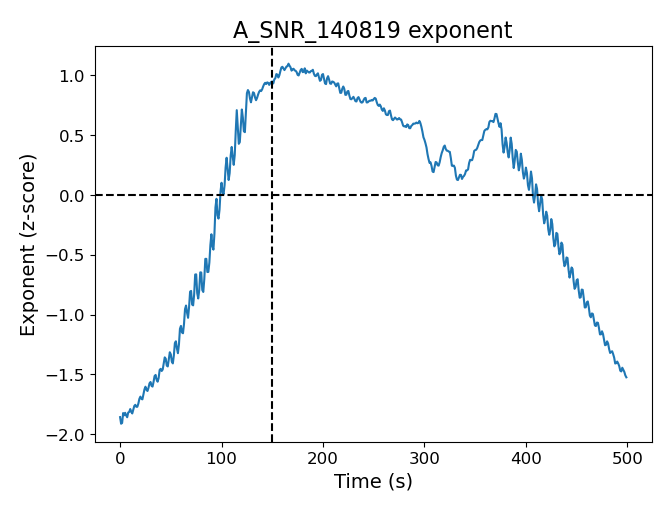

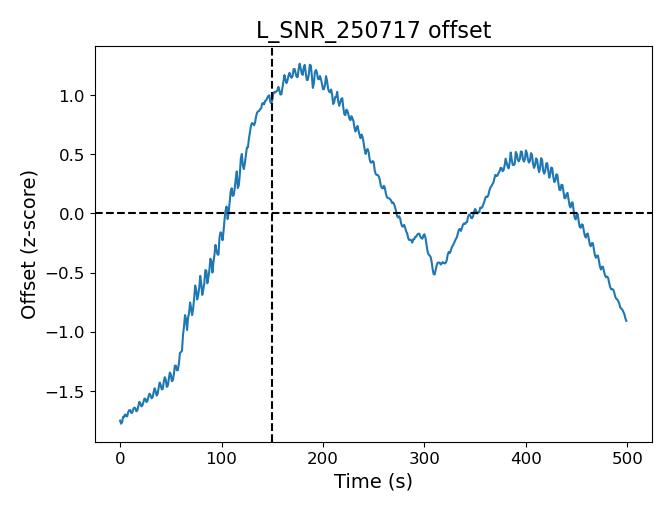

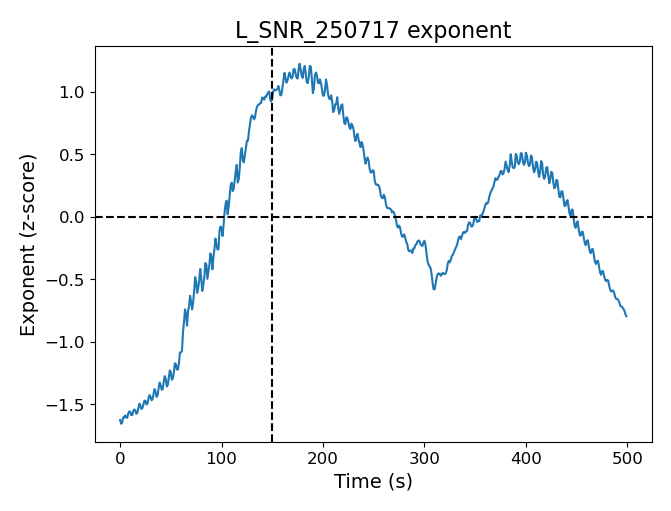

In [37]:
for session in SESSIONS:
    # get df for one session
    session_df = data[data.get('session') == session]

    count = 0
    z_offs = np.array([])
    z_exps = np.array([])

    for i in range(N_CHANS * N_ARRAYS):
        # channel zscore values
        data_a = session_df.iloc[np.arange(count, count + 500)]

        z_off = zscore(data_a['offset'], nan_policy='omit')
        z_offs = np.append(z_offs, z_off)

        z_exp = zscore(data_a['exponent'], nan_policy='omit')
        z_exps = np.append(z_exps, z_exp)

        count = count + 500
    
    # average components per window
    data_az = session_df.assign(z_offset = z_offs).assign(z_exponent = z_exps)
    data_az = data_az.groupby('window').mean().reset_index()

    # plot
    fig, ax = plt.subplots()
    ax.plot(data_az.get('window'), data_az.get('z_offset'))
    ax.set_title(f'{session} offset')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Offset (z-score)')
    ax.axhline(y=0, color='k', linestyle='--')
    ax.axvline(x=IDX_ZERO, color='k', linestyle='--')
    plt.show()
    fig.savefig(f'{PROJECT_PATH}/figures/stm_params/{session}_offset')

    fig, ax = plt.subplots()
    ax.plot(data_az.get('window'), data_az.get('z_exponent'))
    ax.set_title(f'{session} exponent')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Exponent (z-score)')
    ax.axhline(y=0, color='k', linestyle='--')
    ax.axvline(x=IDX_ZERO, color='k', linestyle='--')
    plt.show()
    fig.savefig(f'{PROJECT_PATH}/figures/stm_params/{session}_exponent')